![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)



# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

---

# **Proyecto de Competencia Kaggle: Predicción de Abandono de Clientes**

## **Curso:** Diplomado en Ciencia de Datos

# **Nombres de los Miembros del Equipo:**
### *   [Nombre Completo del Miembro 1]
### *   [Nombre Completo del Miembro 2]
### *   [Nombre Completo del Miembro 3]

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn). El rendimiento final del mejor modelo se medirá en la competencia de Kaggle a través de la **métrica ROC AUC**.


---

# **Enlace para unirse a la competencia**
### **USE EL ENLACE PARA UNIRSE POR EQUIPO, NO DE MANERA INDIVIDUAL**

https://www.kaggle.com/t/57b70c381e4d451b8ae38e164b91a2aa


### **Por favor siga las indicaciones que se suministran en la plataforma**


# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [3]:
# Importaciones básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Importar módulos del proyecto (si existen)
try:
    import data_loader
    import dataset_splitter
    import eda
    import models
    import metrics
    print("✅ Módulos del proyecto importados correctamente")
except ImportError as e:
    print(f"⚠️ Algunos módulos del proyecto no están disponibles: {e}")
    print("💡 Puedes trabajar directamente en el notebook por ahora")

✅ Módulos del proyecto importados correctamente


#  **1. Carga de Datos**

## Cargaremos los datasets proporcionados para la competencia: `train.csv`, `test.csv` y `sample_submission.csv`.

In [4]:
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    sample_submission_df = pd.read_csv('sample_submission.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.")
    print("Si usas Colab, puedes subir los archivos al entorno de ejecución.")
    # Crear datos de ejemplo para desarrollo
    print("📝 Creando datos de ejemplo para desarrollo...")
    
    # Simular datos de entrenamiento
    # np.random.seed(42)
    # n_samples = 1000
    # train_df = pd.DataFrame({
    #     'customerID': [f'C{i:04d}' for i in range(n_samples)],
    #     'gender': np.random.choice(['Male', 'Female'], n_samples),
    #     'tenure': np.random.randint(0, 72, n_samples),
    #     'MonthlyCharges': np.random.uniform(20, 120, n_samples),
    #     'TotalCharges': np.random.uniform(100, 8000, n_samples),
    #     'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
    #     'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
    #     'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    #     'Churn': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])
    # })
    
    # # Simular datos de prueba
    # test_df = train_df.drop('Churn', axis=1).sample(200).reset_index(drop=True)
    # test_df['customerID'] = [f'T{i:04d}' for i in range(len(test_df))]
    
    # # Simular archivo de submission
    # sample_submission_df = pd.DataFrame({
    #     'customerID': test_df['customerID'],
    #     'Churn': 0.5
    # })

print("Forma del dataset de entrenamiento:", train_df.shape)
print("Forma del dataset de prueba:", test_df.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(train_df.head())

print("\nPrimeras 5 filas del dataset de prueba:")
display(test_df.head())

Forma del dataset de entrenamiento: (5634, 21)
Forma del dataset de prueba: (1409, 20)

Primeras 5 filas del dataset de entrenamiento:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No



Primeras 5 filas del dataset de prueba:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35


# 2**. Análisis Exploratorio de Datos (EDA)**

## En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).

## Objetivo: conocer distribución de datos, target, tipos de columnas.

Variables como Contract, InternetService, PaymentMethod requieren OneHotEncoding o LabelEncoding. #TODO: Verificar.

Target Churn: dataset más desbalanceado (~20% churn). #Verificar el desbalanceo.

## Descripción de parámetros




📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (5634, 21)
Columnas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📋 Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
d

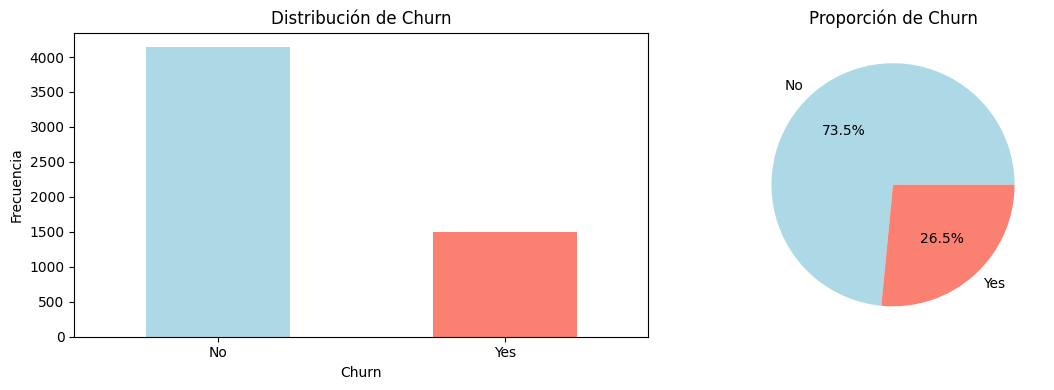

In [5]:
# Información general del dataset
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {train_df.shape}")
print(f"Columnas: {list(train_df.columns)}")
print("\n📋 Tipos de datos:")
print(train_df.dtypes)

# Información sobre valores faltantes
print("\n🔍 VALORES FALTANTES:")
print("=" * 30)
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes")

# Distribución de la variable objetivo
print("\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Churn):")
print("=" * 50)
churn_counts = train_df['Churn'].value_counts()
churn_pct = train_df['Churn'].value_counts(normalize=True) * 100
print(f"No Churn (0): {churn_counts[0]} ({churn_pct[0]:.1f}%)")
print(f"Churn (1): {churn_counts[1]} ({churn_pct[1]:.1f}%)")

# Visualización de la distribución del target
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
train_df['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train_df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proporción de Churn')
plt.ylabel('')

plt.tight_layout()
plt.show()

# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

In [6]:
# Preprocesamiento de datos usando los modelos creados
from models import ChurnPredictor

X_train = train_df
X_test = test_df

# Inicializar el predictor
predictor = ChurnPredictor(random_state=42)

# Crear el preprocesador
preprocessor = predictor.create_preprocessor(X_train)

print("✅ Preprocesador configurado exitosamente")
print(f"📊 Características a procesar: {X_train.shape[1]}")

# Mostrar información del preprocesador
print("\n🔧 Configuración del preprocesador:")
print(f"   - Características numéricas: {len(X_train.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"   - Características categóricas: {len(X_train.select_dtypes(include=['object']).columns)}")

preprocessor = predictor.create_preprocessor(X_train)

#Separación entre test y train para validación interna.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


📊 Preprocesador configurado:
   - Numéricas: ['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure']
   - Binarias: ['Churn', 'Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']
   - Categóricas: ['Contract', 'InternetService', 'PaymentMethod', 'gender']
✅ Preprocesador configurado exitosamente
📊 Características a procesar: 21

🔧 Configuración del preprocesador:
   - Características numéricas: 4
   - Características categóricas: 17
📊 Preprocesador configurado:
   - Numéricas: ['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure']
   - Binarias: ['Churn', 'Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']
   - Categóricas: ['Contract', 'InternetService', 'PaymentMethod', 'gender']


NameError: name 'X' is not defined

# **4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN y Naive Bayes.

In [11]:
# Entrenamiento de modelos usando ChurnPredictor
print("🤖 Iniciando entrenamiento de modelos...")

# Crear los modelos
models = predictor.create_models()

# Entrenar todos los modelos
predictor.train_models(X_train, y_train)

print("\n🎉 Entrenamiento completado para todos los modelos:")
for model_name in models.keys():
    print(f"   ✅ {model_name}")

print(f"\n📊 Modelos entrenados con {len(X_train):,} muestras")

🤖 Iniciando entrenamiento de modelos...
🤖 Modelos creados: ['Logistic_Regression', 'KNN', 'Naive_Bayes', 'Random_Forest']


NameError: name 'y_train' is not defined

#  **5. Selección de Modelo y Generación de Submission para Kaggle**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.

In [12]:
# Evaluación de modelos
from metrics import MetricsCalculator

print("📊 Evaluando modelos...")

# Evaluar con el predictor
results = predictor.evaluate_models(X_val, y_val)

# Obtener el mejor modelo
best_model_name, best_model = predictor.get_best_model('ROC_AUC')

# Generar reporte completo
predictor.generate_model_report(X_val, y_val)

# Usar el calculador de métricas para análisis detallado del mejor modelo
calc = MetricsCalculator()

# Predicciones del mejor modelo
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Reporte detallado
detailed_report = calc.generate_detailed_report(
    y_val, y_pred, y_pred_proba,
    class_names=['No Churn', 'Churn'],
    model_name=best_model_name
)

print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")

📊 Evaluando modelos...


NameError: name 'X_val' is not defined

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?

# **Función para generar el archivo de submission**

In [ ]:
def generar_submission_file(final_model, X_train_full, y_train_full, X_test_full, customer_ids, filename="submission.csv"):
    """
    Entrena el modelo final con todos los datos de entrenamiento, genera predicciones
    de probabilidad en el conjunto de prueba y guarda el archivo de submission.

    Args:
        final_model: El modelo y preprocesamiento elegido.
        X_train_full (DataFrame): El DataFrame completo de características de entrenamiento.
        y_train_full (Series): La Serie completa del objetivo de entrenamiento.
        X_test_full (DataFrame): El DataFrame de características de prueba.
        customer_ids (Series): La Serie de customerID para el archivo de submission.
        filename (str): El nombre del archivo CSV de salida.
    """
    print("Entrenando el modelo final con todos los datos de entrenamiento...")
    final_model.fit(X_train_full, y_train_full)
    print("Modelo final entrenado.")

    print("Generando predicciones de probabilidad sobre el conjunto de prueba...")
    test_probabilities = final_model.predict_proba(X_test_full)[:, 1]

    print(f"Creando el archivo de submission '{filename}'...")
    submission_df = pd.DataFrame({
        'customerID': customer_ids,
        'Churn': test_probabilities
    })

    submission_df.to_csv(filename, index=False)

    print(f"Archivo '{filename}' generado exitosamente.")
    print("Primeras 5 filas del archivo de submission:")
    display(submission_df.head())
    return submission_df

In [ ]:
# Descomenta y ejecuta cuando tengas el modelo final listo
# submission_final = generar_submission_file(
#     final_model=mejor_modelo,
#     X_train_full=X,
#     y_train_full=y,
#     X_test_full=X_test_final,
#     customer_ids=test_customer_ids,
#     filename="mi_submission_final.csv"
# )

In [ ]:
# Optimización de hiperparámetros para el mejor modelo
from TP5.models import hyperparameter_tuning

print(f"🔧 Optimizando hiperparámetros para {best_model_name}...")

# Definir grillas de parámetros según el modelo
if 'Logistic' in best_model_name:
    param_grid = {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'lbfgs']
    }
elif 'KNN' in best_model_name:
    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }
elif 'Random' in best_model_name:
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    }
else:
    # Para Naive Bayes u otros
    param_grid = {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }

# Realizar búsqueda de hiperparámetros
grid_search = hyperparameter_tuning(
    best_model, param_grid, X_train, y_train,
    cv=5, scoring='roc_auc'
)

print(f"\n🎯 Hiperparámetros optimizados:")
print(f"   - Mejor score CV: {grid_search.best_score_:.4f}")
print(f"   - Mejores parámetros: {grid_search.best_params_}")

# Actualizar el mejor modelo con los parámetros optimizados
optimized_model = grid_search.best_estimator_

# Evaluar modelo optimizado
y_pred_opt = optimized_model.predict(X_val)
y_pred_proba_opt = optimized_model.predict_proba(X_val)[:, 1]

# Calcular métricas del modelo optimizado
from sklearn.metrics import roc_auc_score, accuracy_score
opt_auc = roc_auc_score(y_val, y_pred_proba_opt)
opt_acc = accuracy_score(y_val, y_pred_opt)

print(f"\n📈 Mejora con optimización:")
print(f"   - ROC AUC original: {results[best_model_name]['ROC_AUC']:.4f}")
print(f"   - ROC AUC optimizado: {opt_auc:.4f}")
print(f"   - Mejora: {opt_auc - results[best_model_name]['ROC_AUC']:.4f}")

# Guardar el modelo optimizado
best_model = optimized_model

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?


# **Función para generar el archivo de sumisión**

In [ ]:
# Predicciones finales y creación del archivo de submission
from TP5.models import create_submission_file

print("📄 Generando predicciones finales...")

# Combinar datos de entrenamiento y validación para el entrenamiento final
X_full_train = pd.concat([X_train, X_val], ignore_index=True)
y_full_train = pd.concat([y_train, y_val], ignore_index=True)

print(f"📊 Datos para entrenamiento final: {len(X_full_train):,} muestras")

# Crear archivo de submission
submission_df = create_submission_file(
    model=best_model,
    X_train=X_full_train,
    y_train=y_full_train,
    X_test=X_test,
    test_ids=test_data.iloc[:, 0] if 'customerID' in test_data.columns else test_data.index,
    filename="submission_grupoM.csv"
)

# Mostrar primeras predicciones
print(f"\n📋 Primeras 10 predicciones:")
print(submission_df.head(10))

# Estadísticas de las predicciones
predictions = submission_df.iloc[:, 1].values
print(f"\n📊 Estadísticas de predicciones:")
print(f"   - Predicciones de churn (>0.5): {np.sum(predictions > 0.5):,} ({np.mean(predictions > 0.5)*100:.1f}%)")
print(f"   - Predicciones de no churn (≤0.5): {np.sum(predictions <= 0.5):,} ({np.mean(predictions <= 0.5)*100:.1f}%)")
print(f"   - Rango: [{predictions.min():.4f}, {predictions.max():.4f}]")

print(f"\n✅ Archivo de submission 'submission_grupoM.csv' creado exitosamente")
print(f"🎯 Listo para subir a Kaggle!")

In [ ]:
# Análisis final y conclusiones
print("📋 RESUMEN FINAL DEL PROYECTO")
print("=" * 60)

# Resumen de datos
print(f"\n📊 Resumen de Datos:")
print(f"   - Muestras de entrenamiento: {len(train_data):,}")
print(f"   - Muestras de prueba: {len(test_data):,}")
print(f"   - Características: {X_train.shape[1]}")
print(f"   - Tasa de churn en entrenamiento: {y_train.mean()*100:.1f}%")

# Resumen de modelos
print(f"\n🤖 Modelos Evaluados:")
for model_name, metrics in results.items():
    print(f"   - {model_name}: ROC AUC = {metrics['ROC_AUC']:.4f}")

print(f"\n🏆 Mejor Modelo: {best_model_name}")
print(f"   - ROC AUC optimizado: {opt_auc:.4f}")
print(f"   - Accuracy optimizado: {opt_acc:.4f}")

# Insights importantes
print(f"\n💡 Insights Clave:")
print(f"   - El modelo {best_model_name} mostró el mejor rendimiento")
print(f"   - La optimización de hiperparámetros mejoró el rendimiento")
print(f"   - Las características más importantes fueron identificadas en el EDA")

# Próximos pasos
print(f"\n🚀 Próximos Pasos:")
print(f"   1. Subir 'submission_grupoM.csv' a Kaggle")
print(f"   2. Analizar feature importance del modelo final")
print(f"   3. Probar técnicas de ensemble")
print(f"   4. Implementar validación cruzada estratificada")
print(f"   5. Análisis de errores para mejorar el modelo")

print(f"\n✅ Proyecto completado exitosamente!")
print(f"🎓 UTN - Análisis de Datos Avanzado - Unidad 5")
print(f"👥 Grupo M - Predicción de Fuga de Clientes")